In [1]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
import datetime
import datetime
import pandas as pd
import pickle

In [2]:
str_execute_time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
MODEL_PICKLE_FN_NAME = f'extratree-{str_execute_time}.pkl'

In [3]:
# DATA_PATH = '/kaggle/input/tabular-playground-series-feb-2022'
# PICKLE_PATH = '/kaggle/working'
DATA_PATH = '../data'
PICKLE_PATH = '../data'

In [4]:
def make_pkl():
    train = pd.read_csv(f'{DATA_PATH}/train.csv')
    test = pd.read_csv(f'{DATA_PATH}/test.csv')
    with open(f'{PICKLE_PATH}/train.pkl', 'wb') as outf:
        pickle.dump(train, outf)
    with open(f'{PICKLE_PATH}/test.pkl', 'wb') as outf:
        pickle.dump(test, outf)

def read_data():
    with open(f'{PICKLE_PATH}/train.pkl', 'rb') as inpf:
        train = pickle.load(inpf)
    with open(f'{PICKLE_PATH}/test.pkl', 'rb') as inpf:
        test = pickle.load(inpf)
    return train, test

In [5]:
# make_pkl()

In [6]:
train, test = read_data()
train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [7]:
test.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [8]:
train.shape, test.shape

((200000, 288), (100000, 287))

<AxesSubplot:>

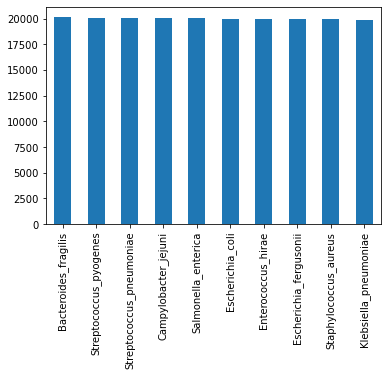

In [9]:
train['target'].value_counts().plot.bar()

In [10]:
y = train['target']
X = train.drop(['row_id', 'target'], axis=1)

In [11]:
from sklearn.ensemble import RandomTreesEmbedding

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
emb = RandomTreesEmbedding()
emb.fit(X_train)

RandomTreesEmbedding()

In [19]:
# emb.transform(X_train.iloc[[0]])
emb.apply(X_train.iloc[[0]])

array([[ 5,  5,  6,  5,  5, 36,  5,  6, 12,  5, 18, 20,  5,  5,  5,  5,
        16,  5,  5,  5,  5,  5,  5,  5,  6,  8,  5,  5,  6,  5, 13, 37,
        24,  5, 12,  5, 24,  5,  5,  5,  5, 27,  5,  5, 12,  6, 12, 36,
         5,  5, 12,  6,  5, 36,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5, 34,  5,  5,  5, 12, 37,  5,  5,  5,  5, 12,  8,  5,
         5,  6,  5,  5,  5,  8,  5,  5,  5, 49,  5,  5,  5,  5,  8,  5,
         5,  5,  5,  8]], dtype=int64)

In [20]:
X_train_emb = emb.transform(X_train)

In [21]:
# model = LogisticRegression()
model = SVC()
# model = RandomForestClassifier()
# model = ExtraTreesClassifier(n_estimators=500)

In [22]:
model.fit(X_train_emb, y_train)

SVC()

In [23]:
MODEL_PICKLE_FN_NAME

'extratree-20220217-232619.pkl'

In [ ]:
# maybe too much.
# with open(f'../pickle/model/{MODEL_PICKLE_FN_NAME}', 'wb') as outf:
#     pickle.dump(model, outf)
# with open(f'../pickle/model/{MODEL_PICKLE_FN_NAME}', 'rb') as inpf:
#     model = pickle.load(inpf)

In [25]:
model.score(X_train_emb, y_train)

0.7689328358208956

In [26]:
X_test_emb = emb.transform(X_test)

In [28]:
model.score(X_test_emb, y_test)

In [ ]:
X_pred = test.drop(['row_id'], axis=1)
X_pred.head()

In [ ]:
X_pred_emb = emb.transform(X_pred)

In [ ]:
y_pred = model.predict(X_pred_emb)
y_pred

In [ ]:
time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
df_pred = pd.concat([test['row_id'], pd.Series(y_pred.reshape(-1), name='target')], axis=1)
name = f'{PICKLE_PATH}/submission-{time}.csv'
df_pred.to_csv(name, index=False)
df_pred

In [ ]:
print(name)

In [ ]:
!kaggle competitions submit -c tabular-playground-series-feb-2022 -f {name} -m "Extratree embedding with svm default parameter"